In [130]:
# Importing all required libraries

import cv2
import numpy as np
import matplotlib.pyplot as plot

In [131]:
# Calculation of Histogram

def calculate_histogram(image_name, no_of_bins=256):
    image = cv2.imread(image_name, 0)
    grayscaled = np.array(image)
    rows, columns = image.shape
    
    # Get all unique intensity values in the image matrix along with their occurences
    values, counts = np.unique(grayscaled, return_counts=True)
    values_dict = dict(zip(values, counts))

    for val in range(256):
        if val not in values_dict.keys():
            values_dict[val] = 0
    
    frequencies = [value for (key, value) in sorted(values_dict.items())]
    
    range_length = float(256/no_of_bins)

    ranges = {}
    lower_limit = 0
    upper_limit = range_length
    max_intensity = 255
    m = max_intensity

    # Calculation of bin limits
    while max_intensity>range_length and upper_limit<m:
        ranges[(lower_limit, upper_limit)] = 0

        if max_intensity<range_length:
            break

        max_intensity-=range_length
        lower_limit = upper_limit
        upper_limit = lower_limit + range_length

    ranges[(lower_limit, m)] = 0

    # Calculation of pixel counts for each bin
    for value in values_dict.keys():
        for ra in ranges:
            if ra[0]<=value<=ra[1]:
                ranges[(ra[0], ra[1])]+=values_dict[value]

    return frequencies, grayscaled, rows, columns, values_dict, ranges

In [132]:
# Plot the histogram

def plot_histogram(m_frequencies, no_of_bins=256):
    positions = np.arange(no_of_bins)
    plot.bar(positions, m_frequencies, align="center")
    plot.ylabel("No. of pixels")
    plot.xlabel("Bins")
    plot.show()

In [133]:
#Calculation of PDF

def calculate_pdf(ranges):
    total_pixels = sum(list(ranges.values()))
    # Normalization for PDF
    probabilities = list(map(lambda x: x/total_pixels, list(ranges.values())))
    
    return probabilities

In [134]:
# Calculation of CDF

def calculate_cdf(probabilities):
    summation = 0
    cdf_plot = []

    # Calculation of cumulative probabilities
    for probability in probabilities:
        summation += probability
        cdf_plot.append(summation)

    return cdf_plot

In [135]:
# Plotting of PDF

def plot_pdf(probabilities):
    plot.bar(range(len(probabilities)), probabilities, align="center")
    plot.xlabel("Bins")
    plot.ylabel("Probabilities")

    plot.show()

In [136]:
# Plotting of CDF

def plot_cdf(cdf_plot):
    plot.step(range(len(cdf_plot)), cdf_plot)
    plot.xlabel("Bins")
    plot.ylabel("Cumulative Probabilities")
    
    plot.show()

In [186]:
# Histogram Equalization

def histogram_equalize(cdf, grayscaled_image, ranges):
    pdf = calculate_pdf(ranges)
    cdf = calculate_cdf(pdf)
    
    new_grey = list(map(lambda x: round(x*255/cdf[-1]), cdf))
    image_equalized = np.interp(grayscaled_image, range(0,255), new_grey)
    
    return image_equalized

In [177]:
# Histogram Matching
def histogram_matching(poor_contrast, target_image):
    frequencies, grayscaled, rows, columns, values_dict, ranges = calculate_histogram(poor_contrast)
    
    probabilities = calculate_pdf(frequencies)
    cdf_plot = calculate_cdf(probabilities)
    
    plot_pdf(probabilities)
    plot_cdf(cdf_plot)
    
    t_frequencies, t_grayscaled, t_rows, t_columns, t_values_dict, t_ranges = calculate_histogram(target_image)
    t_probabilities = calculate_pdf(t_frequencies)
    t_cdf_plot = calculate_cdf(t_probabilities)
    
    plot_pdf(t_probabilities)
    plot_cdf(t_cdf_plot)
    
    s_values, bins, s_counts = np.unique(grayscaled, return_inverse=True,
                                                return_counts=True)

    t_values, t_counts = np.unique(t_grayscaled, return_counts=True)

    s_cumulative = np.cumsum(s_counts).astype(np.float64)
    s_cumulative /= s_cumulative[-1]

    t_cumulative = np.cumsum(t_counts).astype(np.float64)
    t_cumulative /= t_cumulative[-1]

    interp_t_values = np.interp(s_cumulative, t_cumulative, t_values)
    interp_t_values = interp_t_values[bins].reshape(rows, columns)
    
    return interp_t_values

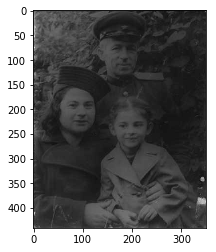

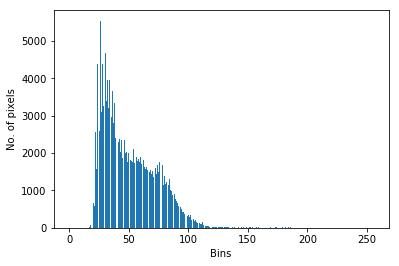

In [178]:
# Plotting of histogram with 256 bins
f_img = cv2.imread("war-time.jpg")
plot.imshow(f_img)
plot.show()

d_frequencies, d_grayscaled, d_rows, d_columns, d_values_dict, d_ranges = calculate_histogram('war-time.jpg')
plot_histogram(d_frequencies)

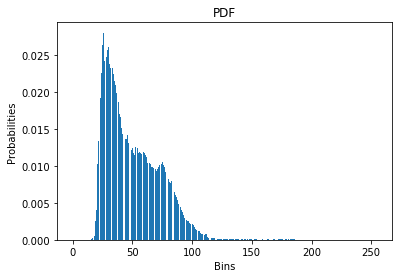

In [179]:
d_probabilities = calculate_pdf(d_ranges)
plot.title("PDF")
plot_pdf(d_probabilities)

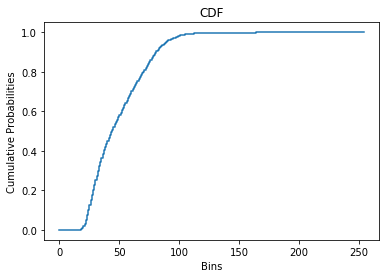

In [180]:
d_cdf_plot = calculate_cdf(d_probabilities)
plot.title("CDF")
plot_cdf(d_cdf_plot)

Enter no. of bins: 5


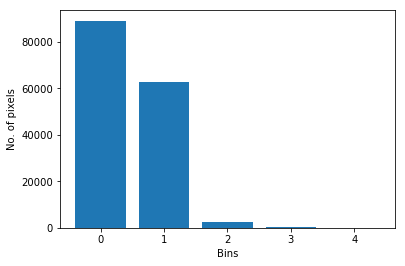

In [181]:
# Taking input of number of bins to be plotted
no_of_bins = int(input("Enter no. of bins: "))

# Calculation of histogram with custom bin count
frequencies, grayscaled, rows, columns, values_dict, ranges = calculate_histogram('war-time.jpg', no_of_bins)

# Plotting of histogram with custom bin count
plot_histogram(list(ranges.values()), no_of_bins)

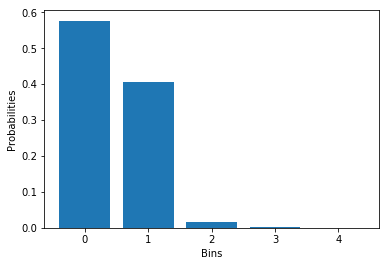

In [182]:
probabilities = calculate_pdf(ranges)
plot_pdf(probabilities)

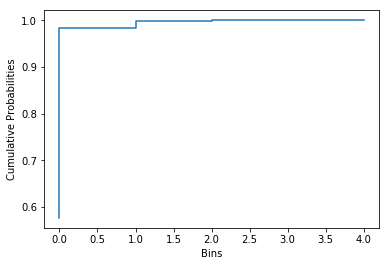

In [183]:
cdf_plot = calculate_cdf(probabilities)
plot_cdf(cdf_plot)

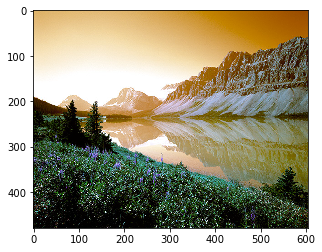

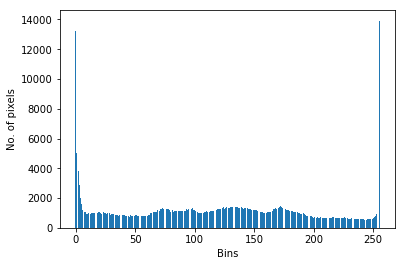

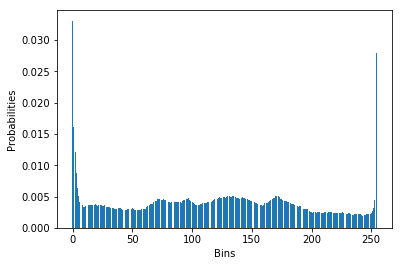

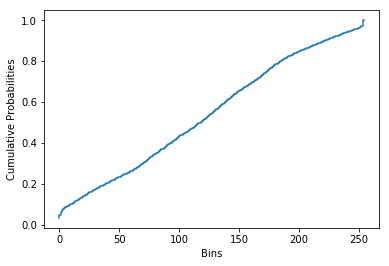

In [184]:
# Histogram operations for second image
s_img = cv2.imread("good-contrast_2.jpg")
plot.imshow(s_img)
plot.show()

s_frequencies, s_grayscaled, s_rows, s_columns, s_values_dict, s_ranges = calculate_histogram('good-contrast_2.jpg')
plot_histogram(s_frequencies)

s_probabilities = calculate_pdf(s_ranges)
plot_pdf(s_probabilities)

cdf_plot = calculate_cdf(s_probabilities)
plot_cdf(cdf_plot)

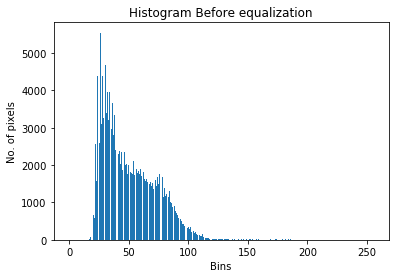

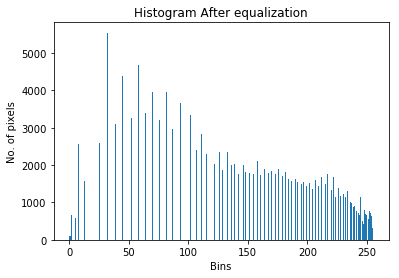

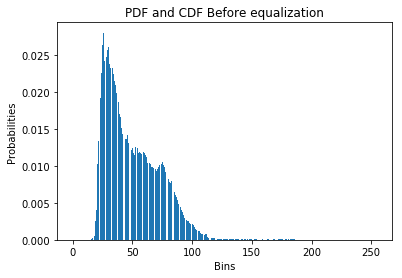

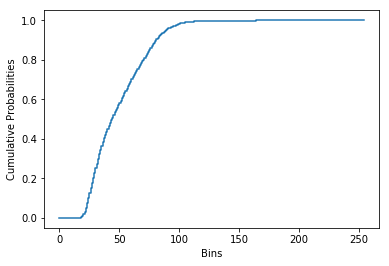

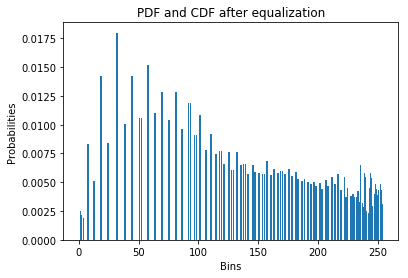

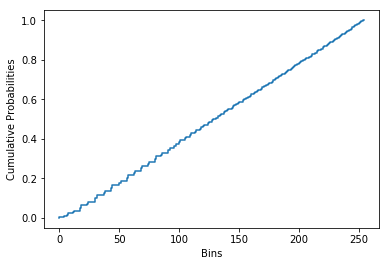

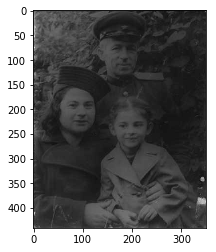

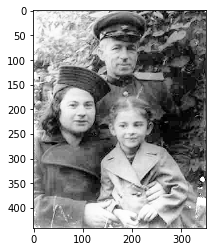

In [191]:
# Histogram Equalization
image_equalized = histogram_equalize(cdf, grayscaled, d_ranges)

cv2.imwrite("equalized.png", image_equalized)
eq_frequencies, eq_grayscaled, eq_rows, eq_columns, eq_values_dict, eq_ranges = calculate_histogram('equalized.png')

plot.title("Histogram Before equalization")
plot_histogram(d_frequencies)
plot.title("Histogram After equalization")
plot_histogram(eq_frequencies)

plot.title("PDF and CDF Before equalization")
plot_pdf(d_probabilities)
plot_cdf(d_cdf_plot)

eq_pdf = calculate_pdf(eq_ranges)
eq_cdf = calculate_cdf(eq_pdf)

plot.title("PDF and CDF after equalization")
plot_pdf(eq_pdf)
plot_cdf(eq_cdf)

img = cv2.imread("war-time.jpg")
plot.imshow(img)
plot.show()

img_eq = cv2.imread("equalized.png")
plot.imshow(img_eq)
plot.show()

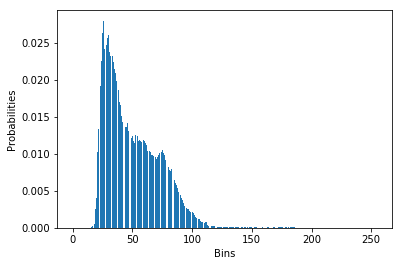

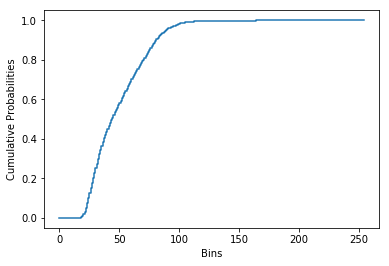

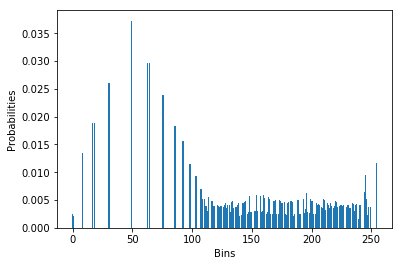

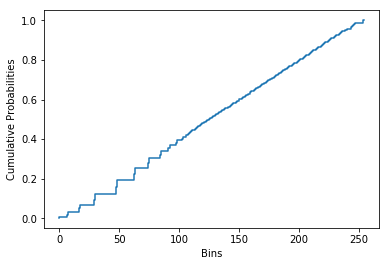

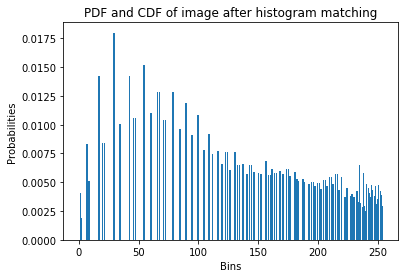

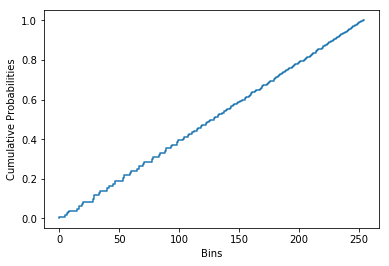

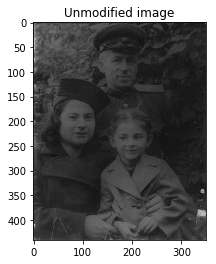

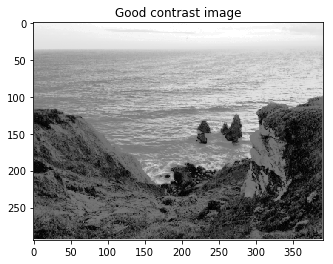

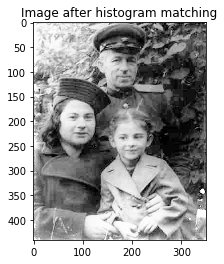

In [129]:
matched_image = histogram_matching("war-time.jpg", "out_4.png")
cv2.imwrite("matched.png", matched_image)

ma_frequencies, ma_grayscaled, ma_rows, ma_columns, ma_values_dict, ma_ranges = calculate_histogram('matched.png')

ma_probabilities = calculate_pdf(ma_ranges)
ma_cdf_plot = calculate_cdf(ma_probabilities)

plot.title("PDF and CDF of image after histogram matching")
plot_pdf(ma_probabilities)
plot_cdf(ma_cdf_plot)

img = cv2.imread("war-time.jpg")
plot.title("Unmodified image")
plot.imshow(img)
plot.show()

img = cv2.imread("out_4.png")
plot.title("Good contrast image")
plot.imshow(img)
plot.show()

img_ma = cv2.imread("matched.png")
plot.title("Image after histogram matching")
plot.imshow(img_ma)
plot.show()